### Problem 1

For the function $f(x)=3x^4 - 4x^3 - 12x^2$

1. Plot the function for $-3\le x\le 3$.
2. Compute local minimums and global minimums of $f(x)$ by hand.
3. Find the minimum of the function using gradient decent method. Try the following initial guess and the learning rate and explain the result.
- Try the initial guess $x_0 = -2$ with the learning rate $10^{-3}$.
- Try the initial guess $x_0 = 1$ with the learning rate $10^{-3}$.
- Try the initial guess $x_0 = 1$ with the learning rate $10^{-1}$.

f(x) absolute minimum: -32
f(x) relative minimum: 13


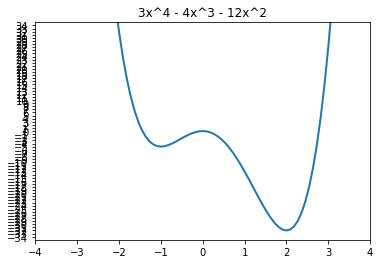

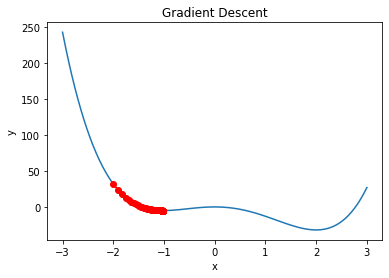

Initial Guess:  -2 
Learning Rate:  0.001


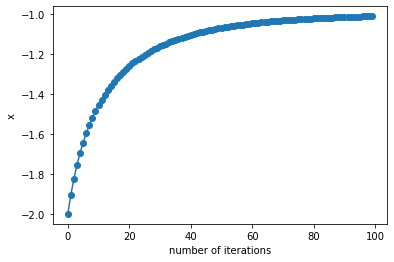

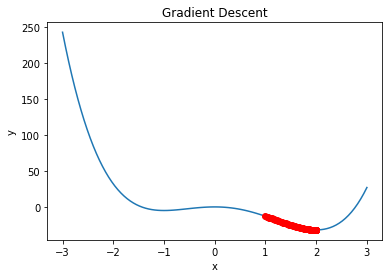

Initial Guess:  1 
Learning Rate:  0.001


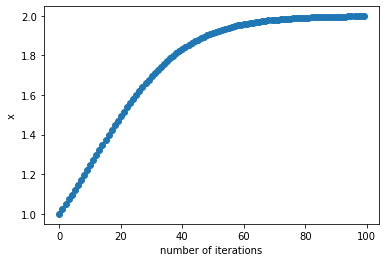

<ipython-input-18-29078a954df9>:37: RuntimeWarning: overflow encountered in double_scalars
  return ((12 *(x ** 3)) - (12 * (x ** 2)) - (24 * x))
<ipython-input-18-29078a954df9>:37: RuntimeWarning: invalid value encountered in double_scalars
  return ((12 *(x ** 3)) - (12 * (x ** 2)) - (24 * x))
<ipython-input-18-29078a954df9>:34: RuntimeWarning: overflow encountered in power
  return ((3 * (x ** 4)) - (4 * (x ** 3)) - (12 * (x ** 2)))
<ipython-input-18-29078a954df9>:34: RuntimeWarning: invalid value encountered in subtract
  return ((3 * (x ** 4)) - (4 * (x ** 3)) - (12 * (x ** 2)))
<ipython-input-18-29078a954df9>:34: RuntimeWarning: overflow encountered in square
  return ((3 * (x ** 4)) - (4 * (x ** 3)) - (12 * (x ** 2)))


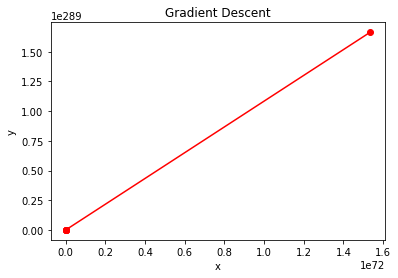

Initial Guess:  -2 
Learning Rate:  0.1


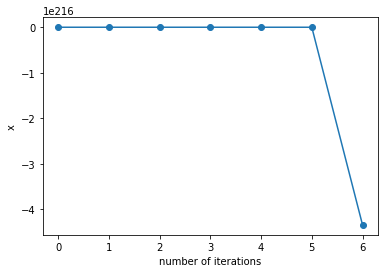

<ipython-input-18-29078a954df9>:37: RuntimeWarning: overflow encountered in double_scalars
  return ((12 *(x ** 3)) - (12 * (x ** 2)) - (24 * x))
<ipython-input-18-29078a954df9>:37: RuntimeWarning: invalid value encountered in double_scalars
  return ((12 *(x ** 3)) - (12 * (x ** 2)) - (24 * x))
<ipython-input-18-29078a954df9>:34: RuntimeWarning: overflow encountered in power
  return ((3 * (x ** 4)) - (4 * (x ** 3)) - (12 * (x ** 2)))
<ipython-input-18-29078a954df9>:34: RuntimeWarning: invalid value encountered in subtract
  return ((3 * (x ** 4)) - (4 * (x ** 3)) - (12 * (x ** 2)))


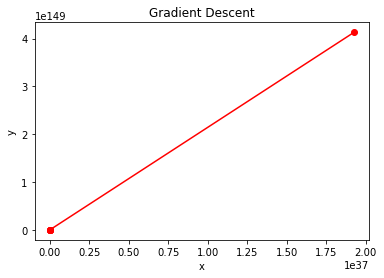

Initial Guess:  1 
Learning Rate:  0.1


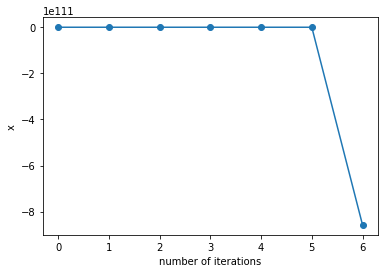

In [18]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-5, 4, 100)
y = (3 * (x ** 4)) - (4 * (x ** 3)) - (12 * (x ** 2))

fig, ax = plt.subplots()
name = plt.title("3x^4 - 4x^3 - 12x^2")

ax.plot(x,y, linewidth = 2.0)
ax.set(xlim=(-4,4), xticks=np.arange(-4,5),ylim=(-35,35), yticks=np.arange(-34,35))
plt.show

#y' = (12 *(x ** 3)) - (12 * (x ** 2)) - (24 * x)
#set y' = 0
#Factor out 12: 0 = 12 * (x**3 - x**2 - 2x)
#Factor out x: 0 = 12 * x * ( x^2 - x - 2)
#Factor polynomial: 0 = 12x * (x - 2) * (x + 1)
#Roots are: -1, 0, 2 

AbsMin = (3 * (2 ** 4)) - (4 * (2 ** 3)) - (12 * (2 ** 2))
print("f(x) absolute minimum:", AbsMin)

RelMin = AbsMin = (3 * (-1 ** 4)) - (4 * (-1 ** 3)) - (12 * (-1 ** 2))
print("f(x) relative minimum:", RelMin)


start = [-2, 1]
alpha = [10 ** -3, 10 ** -1]

for k in range(len(alpha)):
    for j in range(len(start)):
        def f(x):
            return ((3 * (x ** 4)) - (4 * (x ** 3)) - (12 * (x ** 2)))

        def gradient(x):
            return ((12 *(x ** 3)) - (12 * (x ** 2)) - (24 * x))

        def gradient_descent(start, alpha, num_iters):
            x = np.zeros(num_iters)
            x[0] = start[j]
            for i in range (num_iters-1):
                x[i+1] = x[i] - alpha[k] * gradient(x[i])
            return x

       ## start = -2
       ## alpha = 0.001
        num_iters = 100

        x = gradient_descent(start, alpha, num_iters)
        
        
        x_vals = np.linspace(-3, 3, 100)
        y_vals = f(x_vals)
        plt.figure()
        plt.plot(x_vals, y_vals)
        plt.plot(x, f(x), 'ro-')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Gradient Descent')
        plt.show()
        
        print("Initial Guess: ", start[j], "\nLearning Rate: ", alpha[k])
        
        plt.figure()
        plt.plot(x, 'o-')
        plt.xlabel('number of iterations')
        plt.ylabel('x')
        plt.show()
        

### Problem 2
In class, we use the gradient descent method to compute the solution of $w$ and $b$ in the logistic regression method. Please replace the gradient descent method by the Newton's method and verify that
1. The result of the Newton's method is the same as the result of the gradient descent method. (Hint: print the values of $w$ and $b$ and verify that they are the same.)
2. The Newton's method converges much faster than the gradient descent method. (Hint: plot the results of the Newton's method and the gradient descent method in terms of the number of iterations in the same figure.)

In [28]:
import numpy as np
import matplotlib as plt
from sklearn.datasets import make_classification

w = np.zeros((3, 1))
    
print("Newton's Method :")

# Generate a random binary classification dataset
X, y = make_classification(
    n_samples=1000, # number of samples
    n_features=2, # number of features
    n_informative=2, # number of useful features
    n_classes=2, # number of classes (or labels)
    n_redundant=0, # number of redundant features
    random_state=0 # fix random seed to get the same result
    )

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary Classification Dataset')
plt.show()

print(X.shape, y.shape)

for i in range(10):    
    print(X[i,:], y[i])
    
from sklearn.metrics import accuracy_score

# Add a column of ones to the training set for the bias term
X = np.hstack((X, np.ones((X.shape[0], 1))))

# Initialize the weights to zeros
w = np.zeros(X.shape[1])

# Set the learning rate and number of iterations
##alpha = 0.01
num_iters = 100000

## Define the sigmoid function
##def sigmoid(z):
##   return 1 / (1 + np.exp(-z))

# Define the gradient of the cost function
##def gradient(X, y, w):
##    m = X.shape[0]
##    h = sigmoid(X.dot(w))
##    grad = (1 / m) * X.T.dot(h - y)
##    return grad

def f(x):
    return ((3 * (x ** 4)) - (4 * (x ** 3)) - (12 * (x ** 2)))

def df(X):
    return ((12 *(X ** 3)) - (12 * (X ** 2)) - (24 * X))

def d2f(x):
    return ((36 * (X ** 2)) - (24 * X) - 24)

def netwon_method(x):
    X[i + 1] = X[i] - (1 / d2f(X[i])) * df(X[i])
    return X[i]

# Run Newton's Method
for i in range(num_iters):
    ##grad = gradient(X, y, w)
    ##w = w - alpha * grad
    w = newton_method(X)
    
    
    
print(w)

# example of accuracy score
z_pred = [0, 2, 1, 3]
z_true = [0, 2, 2, 3]
accuracy_score(z_true, z_pred)

# Make predictions on the testing set
# round to the nearest integer
y_pred = np.round(sigmoid(X.dot(w)))

# Calculate the accuracy of the model
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

# Create a meshgrid of feature values
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = sigmoid(np.c_[xx.ravel(), yy.ravel(), np.ones((xx.ravel().shape[0], 1))].dot(w))
Z = Z.reshape(xx.shape)

# Plot the prediction results
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.colorbar()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary Classification Prediction Results')
plt.show()

Newton's Method :


AttributeError: module 'matplotlib' has no attribute 'scatter'

Gradient Descent Method :


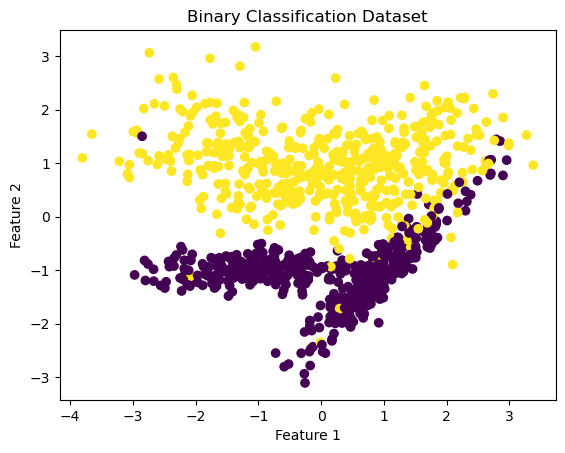

(1000, 2) (1000,)
[-1.44101238 -0.78076667] 0
[0.00160532 1.41689818] 1
[-0.96364947  1.03086158] 1
[-2.29867039  2.38143442] 1
[-0.30088621  0.74481441] 1
[-0.86913737  1.22396669] 1
[-2.09054575 -1.29813125] 0
[0.37704474 0.83093271] 1
[-1.60420273 -0.30943769] 1
[-1.6082507  -0.83841403] 0
[-0.52626125  4.15580826  0.70187711]
Accuracy: 0.952


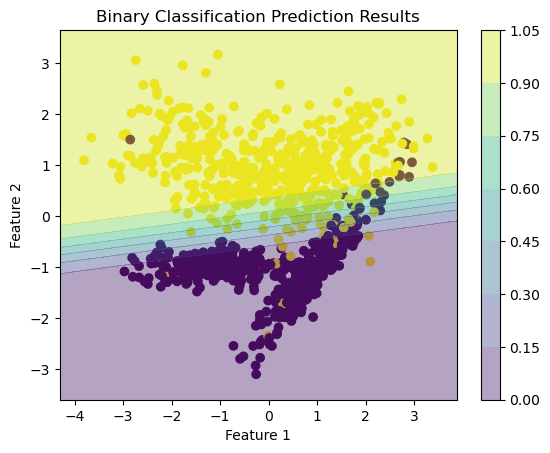

Newton's Method :


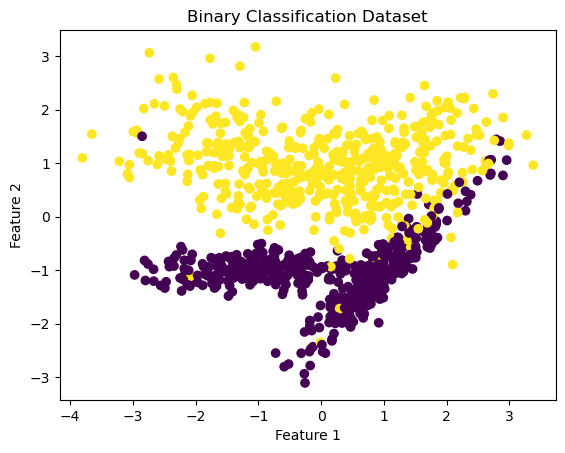

(1000, 3) (1000,)
[-1.44101238 -0.78076667  1.        ] 0
[0.00160532 1.41689818 1.        ] 1
[-0.96364947  1.03086158  1.        ] 1
[-2.29867039  2.38143442  1.        ] 1
[-0.30088621  0.74481441  1.        ] 1
[-0.86913737  1.22396669  1.        ] 1
[-2.09054575 -1.29813125  1.        ] 0
[0.37704474 0.83093271 1.        ] 1
[-1.60420273 -0.30943769  1.        ] 1
[-1.6082507  -0.83841403  1.        ] 0
[[0.24351268 0.24543271 0.26894142 0.26894142]
 [0.50000032 0.95674036 0.26894142 0.26894142]
 [0.26856553 0.21562062 0.26894142 0.26894142]
 ...
 [0.50064936 0.26859848 0.26894142 0.26894142]
 [0.78912947 0.50348886 0.26894142 0.26894142]
 [0.5003557  0.20443768 0.26894142 0.26894142]]


ValueError: Classification metrics can't handle a mix of binary and multiclass-multioutput targets

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

print("Gradient Descent Method :")

# Generate a random binary classification dataset
X, y = make_classification(
    n_samples=1000, # number of samples
    n_features=2, # number of features
    n_informative=2, # number of useful features
    n_classes=2, # number of classes (or labels)
    n_redundant=0, # number of redundant features
    random_state=0 # fix random seed to get the same result
    )

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary Classification Dataset')
plt.show()

print(X.shape, y.shape)

for i in range(10):    
    print(X[i,:], y[i])
    
from sklearn.metrics import accuracy_score

# Add a column of ones to the training set for the bias term
X = np.hstack((X, np.ones((X.shape[0], 1))))

# Initialize the weights to zeros
w = np.zeros(X.shape[1])

# Set the learning rate and number of iterations
alpha = 0.01
num_iters = 100000

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the gradient of the cost function
def gradient(X, y, w):
    m = X.shape[0]
    h = sigmoid(X.dot(w))
    grad = (1 / m) * X.T.dot(h - y)
    return grad

# Run gradient descent
for i in range(num_iters):
    grad = gradient(X, y, w)
    w = w - alpha * grad
    
print(w)

# example of accuracy score
z_pred = [0, 2, 1, 3]
z_true = [0, 2, 2, 3]
accuracy_score(z_true, z_pred)

# Make predictions on the testing set
# round to the nearest integer
y_pred = np.round(sigmoid(X.dot(w)))

# Calculate the accuracy of the model
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

# Create a meshgrid of feature values
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = sigmoid(np.c_[xx.ravel(), yy.ravel(), np.ones((xx.ravel().shape[0], 1))].dot(w))
Z = Z.reshape(xx.shape)

# Plot the prediction results
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.colorbar()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary Classification Prediction Results')
plt.show()

print("Newton's Method :")

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary Classification Dataset')
plt.show()

print(X.shape, y.shape)

for i in range(10):    
    print(X[i,:], y[i])
    
from sklearn.metrics import accuracy_score

# Add a column of ones to the training set for the bias term
X = np.hstack((X, np.ones((X.shape[0], 1))))

# Initialize the weights to zeros
w = np.zeros(X.shape[1])

# Set the learning rate and number of iterations
##alpha = 0.01
num_iters = 100000

## Define the sigmoid function
def sigmoid(z):
    return (1 / (1 + np.exp(-z)))


# Define the gradient of the cost function
##def gradient(X, y, w):
##    m = X.shape[0]
##    h = sigmoid(X.dot(w))
##    grad = (1 / m) * X.T.dot(h - y)
##    return grad

def f(X):
    return ((3 * (X ** 4)) - (4 * (X ** 3)) - (12 * (X ** 2)))

def df(X):
    return ((12 *(X ** 3)) - (12 * (X ** 2)) - (24 * X))

def d2f(X):
    return ((36 * (X ** 2)) - (24 * X) - 24)

def newton_method(X):
    X = X - (1 / d2f(X)) * df(X)
    return X

# Run Newton's Method
for i in range(num_iters):
    ##grad = gradient(X, y, w)
    ##w = w - alpha * grad
    w = sigmoid(newton_method(X))
    
    

print(w)

w = w.transpose()

# example of accuracy score
z_pred = [0, 2, 1, 3]
z_true = [0, 2, 2, 3]
accuracy_score(z_true, z_pred)

# Make predictions on the testing set
# round to the nearest integer
y_pred = np.round(X.dot(w))

# Calculate the accuracy of the model
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

# Create a meshgrid of feature values
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = sigmoid(np.c_[xx.ravel(), yy.ravel(), np.ones((xx.ravel().shape[0], 1))].dot(w))
Z = Z.reshape(xx.shape)

# Plot the prediction results
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.colorbar()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary Classification Prediction Results')
plt.show()